# Objective

* This dataset can be used to predict the presence of kidney stones based on urine analysis.

The 79 urine specimens, were analyzed in an effort to
determine if certain physical characteristics of the urine might be related to the
formation of calcium oxalate crystals.
The six physical characteristics of the urine are: (1) specific gravity, the density of the urine relative to water; (2) pH, the negative logarithm of the hydrogen ion; (3) osmolarity (mOsm), a unit used in biology and medicine but not in
physical chemistry. Osmolarity is proportional to the concentration of
molecules in solution; (4) conductivity (mMho milliMho). One Mho is one
reciprocal Ohm. Conductivity is proportional to the concentration of charged
ions in solution; (5) urea concentration in millimoles per litre; and (6) calcium
concentration (CALC) in millimolesllitre.

The data is obtained from 'Physical Characteristics of Urines With and Without Crystals',a chapter from Springer Series in Statistics.

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
new = pd.read_csv(r"C:\Users\shubh\Desktop\Machine Learning\kindey stone urine analysis.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


#  2. Data Pre-Processing 

1. Data Type and conversion
2. Identifying & Treatment Missing Value 

In [3]:
new.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [4]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


#### 2.2. Identifying & Treatment Missing Value

In [5]:
# count the number of NaN values in each column
new.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

#### Replacing Missing value by Mode

In [6]:
new["target"].mode()[0]

0

In [7]:
for column in ['target']:
    new[column].fillna(new[column].mode()[0], inplace=True)

In [8]:
new.target.value_counts(dropna=False)

0    45
1    34
Name: target, dtype: int64

In [9]:
# count the number of NaN values in each column
print(new.isnull().sum())

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64


In [10]:
new.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


#  Identify & Treatment of Outlier 

<AxesSubplot:xlabel='osmo'>

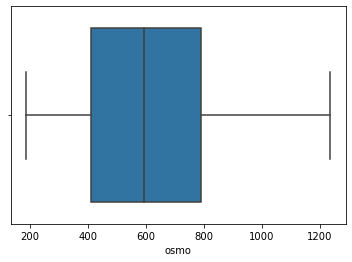

In [11]:
sns.boxplot(new.osmo)

<AxesSubplot:ylabel='gravity'>

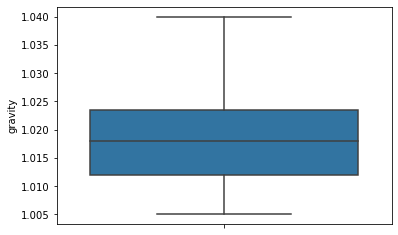

In [12]:
sns.boxplot(y='gravity',data=new)  # Single Variable

In [13]:
q1 = new['ph'].quantile(0.25)
q3 = new['ph'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

7.667499999999999

In [14]:
new['ph']=np.where(new['ph'] > upper_limit,upper_limit,new['ph']) 
# upper limit

<AxesSubplot:ylabel='ph'>

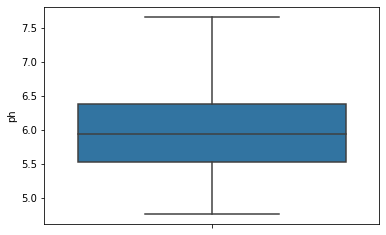

In [15]:
sns.boxplot(y='ph',data=new)  # Single Variable

<AxesSubplot:ylabel='cond'>

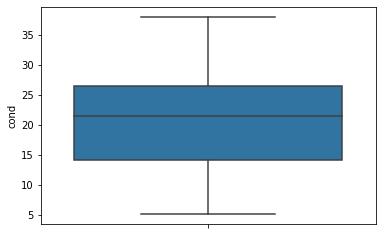

In [16]:
sns.boxplot(y='cond',data=new)

<AxesSubplot:ylabel='urea'>

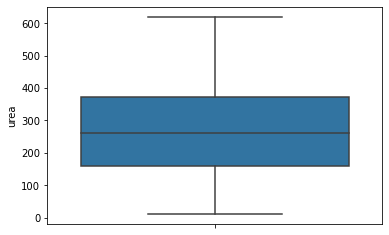

In [17]:
sns.boxplot(y='urea',data=new)

In [18]:
q1 = new['calc'].quantile(0.25)
q3 = new['calc'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

12.635

In [19]:
new['calc']=np.where(new['calc'] > upper_limit,upper_limit,new['calc']) 
# upper limit

<AxesSubplot:ylabel='calc'>

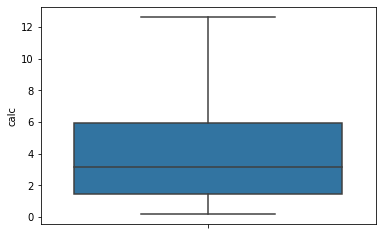

In [20]:
sns.boxplot(y='calc',data=new)

# EDA

* Bad Rate Analysis == 0 : Good & 1 : Bad
* Bivariate Analysis # 

In [21]:
new.target.value_counts()

0    45
1    34
Name: target, dtype: int64

In [22]:
(34/79)*100    # 43% are bad analysis

43.037974683544306

<AxesSubplot:xlabel='target', ylabel='count'>

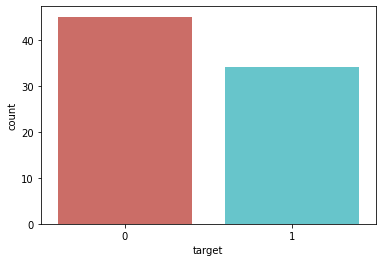

In [23]:
sns.countplot(x='target',data=new,palette='hls')

In [24]:
new.groupby('target').mean()

,gravity,ph,osmo,cond,urea,calc
target,,,,,,
0,1.015489,6.093056,565.288889,20.404444,237.111111,2.624889
1,1.021588,5.920735,675.794118,21.355882,305.176471,6.080735


# Visualizations

Text(0, 0.5, 'Frequency')

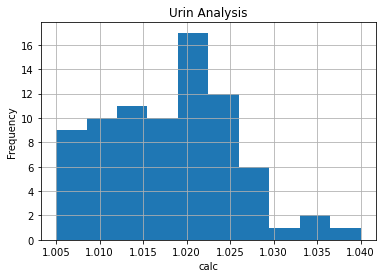

In [25]:
new.gravity.hist()
plt.title('Urin Analysis')
plt.xlabel('calc')
plt.ylabel('Frequency')
#plt.savefig('Income_age')

Text(0, 0.5, 'Frequency')

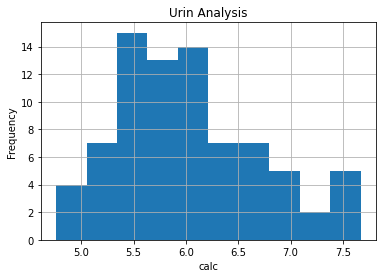

In [26]:
new.ph.hist()
plt.title('Urin Analysis')
plt.xlabel('calc')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

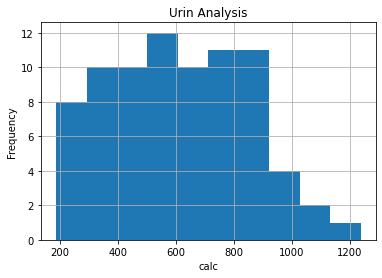

In [27]:
new.osmo.hist()
plt.title('Urin Analysis')
plt.xlabel('calc')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

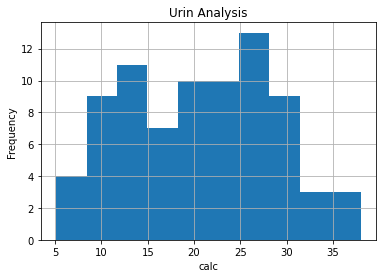

In [28]:
new.cond.hist()
plt.title('Urin Analysis')
plt.xlabel('calc')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

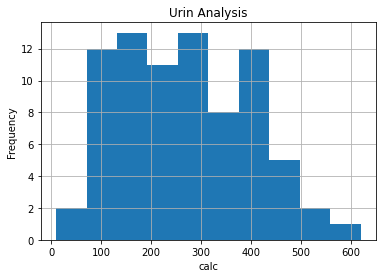

In [29]:
new.urea.hist()
plt.title('Urin Analysis')
plt.xlabel('calc')
plt.ylabel('Frequency')

#  Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [30]:
data_final=new

In [31]:
data_final.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [33]:
from sklearn.state_model as train_test_split
# define our input variable (X) & output variable
X = data_final.drop('target', axis = 1)
Y = data_final[['target']]
# Split X and y into X_
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.30, random_state=123)

ModuleNotFoundError: No module named 'sklearn.state_model'

#  Step 4 : Performing Logistic Regression

In [ ]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

#  Hypothesis

* H0 :- There is no log linear relationship between Target and Gender , Income & Balance

Vs 

* H1 :- There is log linear relationship between Target and Gender , Income & Balance

Alpha = 0.05

In [ ]:
# Needed to run the logistic regression
import statsmodels.formula.api as smf
result=smf.logit("target~gravity+ph+osmo+cond+urea+calc",data=train).fit()
result.summary2()

In [ ]:
model=smf.logit("target~gravity+calc",data=train).fit()
model.summary2()

* We Reject Ho 

### Conclusion :- 

There is log linear relationship between Target and Gender & Balance


# Odds Ratio

In [ ]:
model.params   # coefficient  = Beta0 & Beta1

In [ ]:
Model_Odds=pd.DataFrame(np.exp(model.params),columns=["Odds_Ratio"])
Model_Odds

#  Step 6 : Predictions on Train Dataset

In [82]:
train.head()

,gravity,ph,osmo,cond,urea,calc,target,Probability
60,1.025,5.7100,854,27.0,385,7.18,1,0.770385
20,1.024,6.3000,874,29.9,380,5.16,0,0.617900
14,1.011,5.2100,450,17.9,161,1.53,0,0.122876
74,1.025,7.6675,721,23.6,301,9.04,1,0.856838
16,1.007,6.6300,253,8.4,133,1.05,0,0.074473


In [83]:
train['Probability']=model.predict(train)
train.head()

,gravity,ph,osmo,cond,urea,calc,target,Probability
60,1.025,5.7100,854,27.0,385,7.18,1,0.770385
20,1.024,6.3000,874,29.9,380,5.16,0,0.617900
14,1.011,5.2100,450,17.9,161,1.53,0,0.122876
74,1.025,7.6675,721,23.6,301,9.04,1,0.856838
16,1.007,6.6300,253,8.4,133,1.05,0,0.074473


 * 0.85% chances the the kidany stone rediction urin analysis

In [84]:
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0)  #thershold  >0.7
train.sort_values(by='Predicted',ascending=False).head()

,gravity,ph,osmo,cond,urea,calc,target,Probability,Predicted
60,1.025,5.71,854,27.0,385,7.18,1,0.770385,1
73,1.022,5.09,736,19.8,418,8.53,1,0.790303,1
49,1.024,5.36,853,27.6,364,7.31,1,0.759450,1
7,1.029,5.67,1107,35.9,550,8.48,0,0.882892,1
63,1.033,5.58,1032,29.1,430,8.94,1,0.928796,1


# Step 7 : Model Performance Metrics

In [85]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'],train['target'])
print(matrix)

[[33 14]
 [ 1  7]]


In [86]:
Accuracy_Train=((33+7)/(55)*100)
print(Accuracy_Train)

72.72727272727273


 * Accuracy of Model is 72% , So we say Good Model 

In [87]:
from sklearn.metrics import classification_report
print(classification_report(train['target'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        34
           1       0.88      0.33      0.48        21

    accuracy                           0.73        55
   macro avg       0.79      0.65      0.65        55
weighted avg       0.77      0.73      0.69        55



* Accuracy of Bad Customer Capture by Model is 33% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 97% ( specificity) 

* Accuracy of Predicted Good Customer And often Correct is 73% 


# Step 8 : Predictions on Test Dataset

In [88]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gravity,ph,osmo,cond,urea,calc,target
64,1.015,5.98,487,14.8,198,3.16,1
58,1.040,6.28,838,14.3,486,8.28,1
59,1.021,5.56,658,23.6,224,2.33,1
4,1.005,6.52,187,7.5,91,1.16,0
69,1.026,6.29,833,22.2,457,4.45,1


In [89]:
test['Probability']=model.predict(test)
test.head()

,gravity,ph,osmo,cond,urea,calc,target,Probability
64,1.015,5.98,487,14.8,198,3.16,1,0.258618
58,1.040,6.28,838,14.3,486,8.28,1,0.955718
59,1.021,5.56,658,23.6,224,2.33,1,0.330970
4,1.005,6.52,187,7.5,91,1.16,0,0.063671
69,1.026,6.29,833,22.2,457,4.45,1,0.613549


In [90]:
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

,gravity,ph,osmo,cond,urea,calc,target,Probability,Predicted
64,1.015,5.98,487,14.8,198,3.16,1,0.258618,0
58,1.040,6.28,838,14.3,486,8.28,1,0.955718,1
59,1.021,5.56,658,23.6,224,2.33,1,0.330970,0
4,1.005,6.52,187,7.5,91,1.16,0,0.063671,0
69,1.026,6.29,833,22.2,457,4.45,1,0.613549,0


# Step 9 : Model Performance Metrics on Test data 

In [91]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['target'])
print(matrix)

[[11  7]
 [ 0  6]]


In [92]:
Accuracy_test=((11+6)/(24)*100)
Accuracy_test

70.83333333333334

 *  Accuracy of Model Performance on Test data is 70% , So we say Good Model Performance 

In [93]:
from sklearn.metrics import classification_report
print(classification_report(test['target'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        11
           1       1.00      0.46      0.63        13

    accuracy                           0.71        24
   macro avg       0.81      0.73      0.70        24
weighted avg       0.82      0.71      0.69        24



* Accuracy of Bad Customer Capture by Model is 46% 
* Accuracy of Good Customer Capture by Model is 100%  
* Accuracy of Predicted Good Customer And often Correct is 71% 
